# Main Jupyter Noootbook

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo



## EDA

In [2]:
tweet_df = pd.read_csv('data\db_tweet_emotion.csv', encoding= 'unicode_escape')

In [3]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
tweet = tweet_df['tweet_text']
directed = tweet_df['emotion_in_tweet_is_directed_at']
emotion = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']

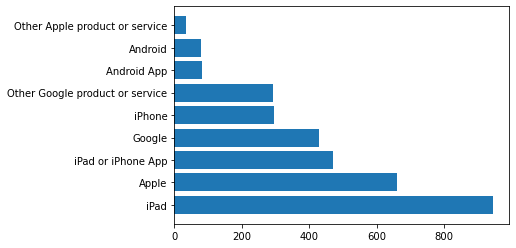

In [6]:
plt.barh(directed.value_counts().index, directed.value_counts().values);

In [7]:
directed.value_counts().sum()

3291

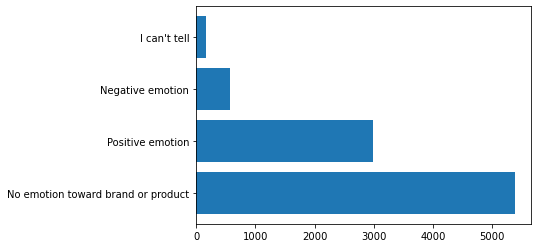

In [8]:
plt.barh(emotion.value_counts().index, emotion.value_counts().values);

In [9]:
emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Clean Up & Tokenize

In [10]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')


In [11]:
vg = VIA_GoGo()

In [12]:
clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [13]:
clean_df.brand.value_counts()

Apple     6093
Google    2996
Name: brand, dtype: int64

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet_text            9089 non-null   object
 1   directed_at           3291 non-null   object
 2   emotion               9089 non-null   object
 3   emotion_num           9089 non-null   int64 
 4   brand                 9089 non-null   object
 5   tweet_text_tokenized  9089 non-null   object
 6   joined_tokens         9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 497.2+ KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(clean_df['joined_tokens'], 
                                                    clean_df['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [16]:
# Using Linear Support Vector Machine
nb1 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
nb1.fit(X_train, y_train)

y_pred = nb1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7105147382314122


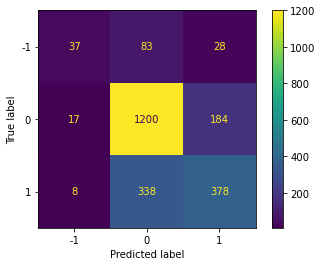

In [17]:
plot_confusion_matrix(nb1, X_test, y_test)

In [18]:
# Using Naive Bayes
nb2 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb2.fit(X_train, y_train)

y_pred = nb2.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6695996480422349


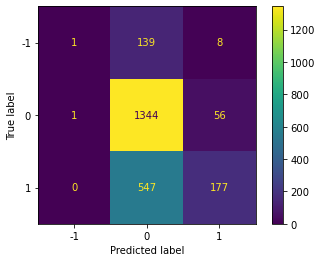

In [19]:
plot_confusion_matrix(nb2, X_test, y_test)

In [20]:
# Using Logistic Regression
nb3 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
nb3.fit(X_train, y_train)

y_pred = nb3.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6929168499780026


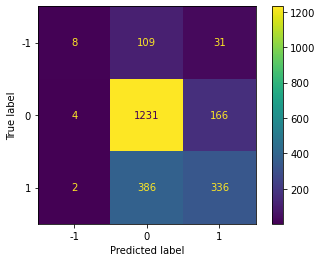

In [21]:
plot_confusion_matrix(nb3, X_test, y_test);